## Package Governance - Custom Conda Repository - Local File Channel

For enterprise environments, it is very important to control the access and usage of modules and libraries. There are multiple ways of governing packages and modules in Cloud Pak for Data. In this example, we will show how to upload a `conda` package into the CPD cluster, configure a custom environment, and users will be able to access this package without having to manually installing it in their notebook runtime environment.

Prerequites:
  - some CLI tools are needed for this tutorial (`oc, curl, conda`) as well as a Linux/Mac command line environment
  - to upload to the cluster shared storage, the user has to be a OpenShift admin (or have access to the CPD installation namespace) and has access to the CPD shared storage
  - to create custom environments, the user has to have admin or editor role in CPD platform

The high level steps are as follow:
1. Create conda file repository on local machine
2. Copy to CPD Cluster's shared storage
3. Create new environments to be used in notebooks 

### 1) Create File Channel on Local Machine

First we create the file based repository channel on our local machine, so we can then copy over the required repository structure

```
mkdir custom-channel
```

Create subdirectories for packages of different architecture
```
mkdir custom-channel/noarch \
      custom-channel/linux-64 \
      custom-channel/osx-64 \
      custom-channel/win-64
```

Copy your conda packages into the proper subdirectory - example here downloads a conda package into "noarch"
```
curl -L https://anaconda.org/conda-forge/seawater/3.3.4/download/noarch/seawater-3.3.4-py_1.tar.bz2 \
    -o custom-channel/noarch/seawater-3.3.4-py_1.tar.bz2
```

Generate necessary metatdata files for the file based channel
```
conda index custom-channel
```

See preview of the channel dir

```
ls -lah custom-channel/noarch
```

### 2) Copy to CPD cluster

We copy the custom channel we just created locally to the
CPD cluster shared storage. This requires having OCP cluster level access to the namespace where CPD is installed.

```
oc project zen # or which ever project cpd control plane is installed

export ibm_nginx_pod=`oc get pods -l component=ibm-nginx -o jsonpath='{.items[0].metadata.name}'`

echo $ibm_nginx_pod

oc cp ./custom-channel ${ibm_nginx_pod}:/user-home/_global_/config/conda/

oc exec ${ibm_nginx_pod} -- chmod -R a+r "/user-home/_global_/config/conda/custom-channel"
```


### 3) Create Environment Customization

Create an environment customization similar to one below which would point to the custom package we are including in our environment


Then give your custom environment a name, and click "Create
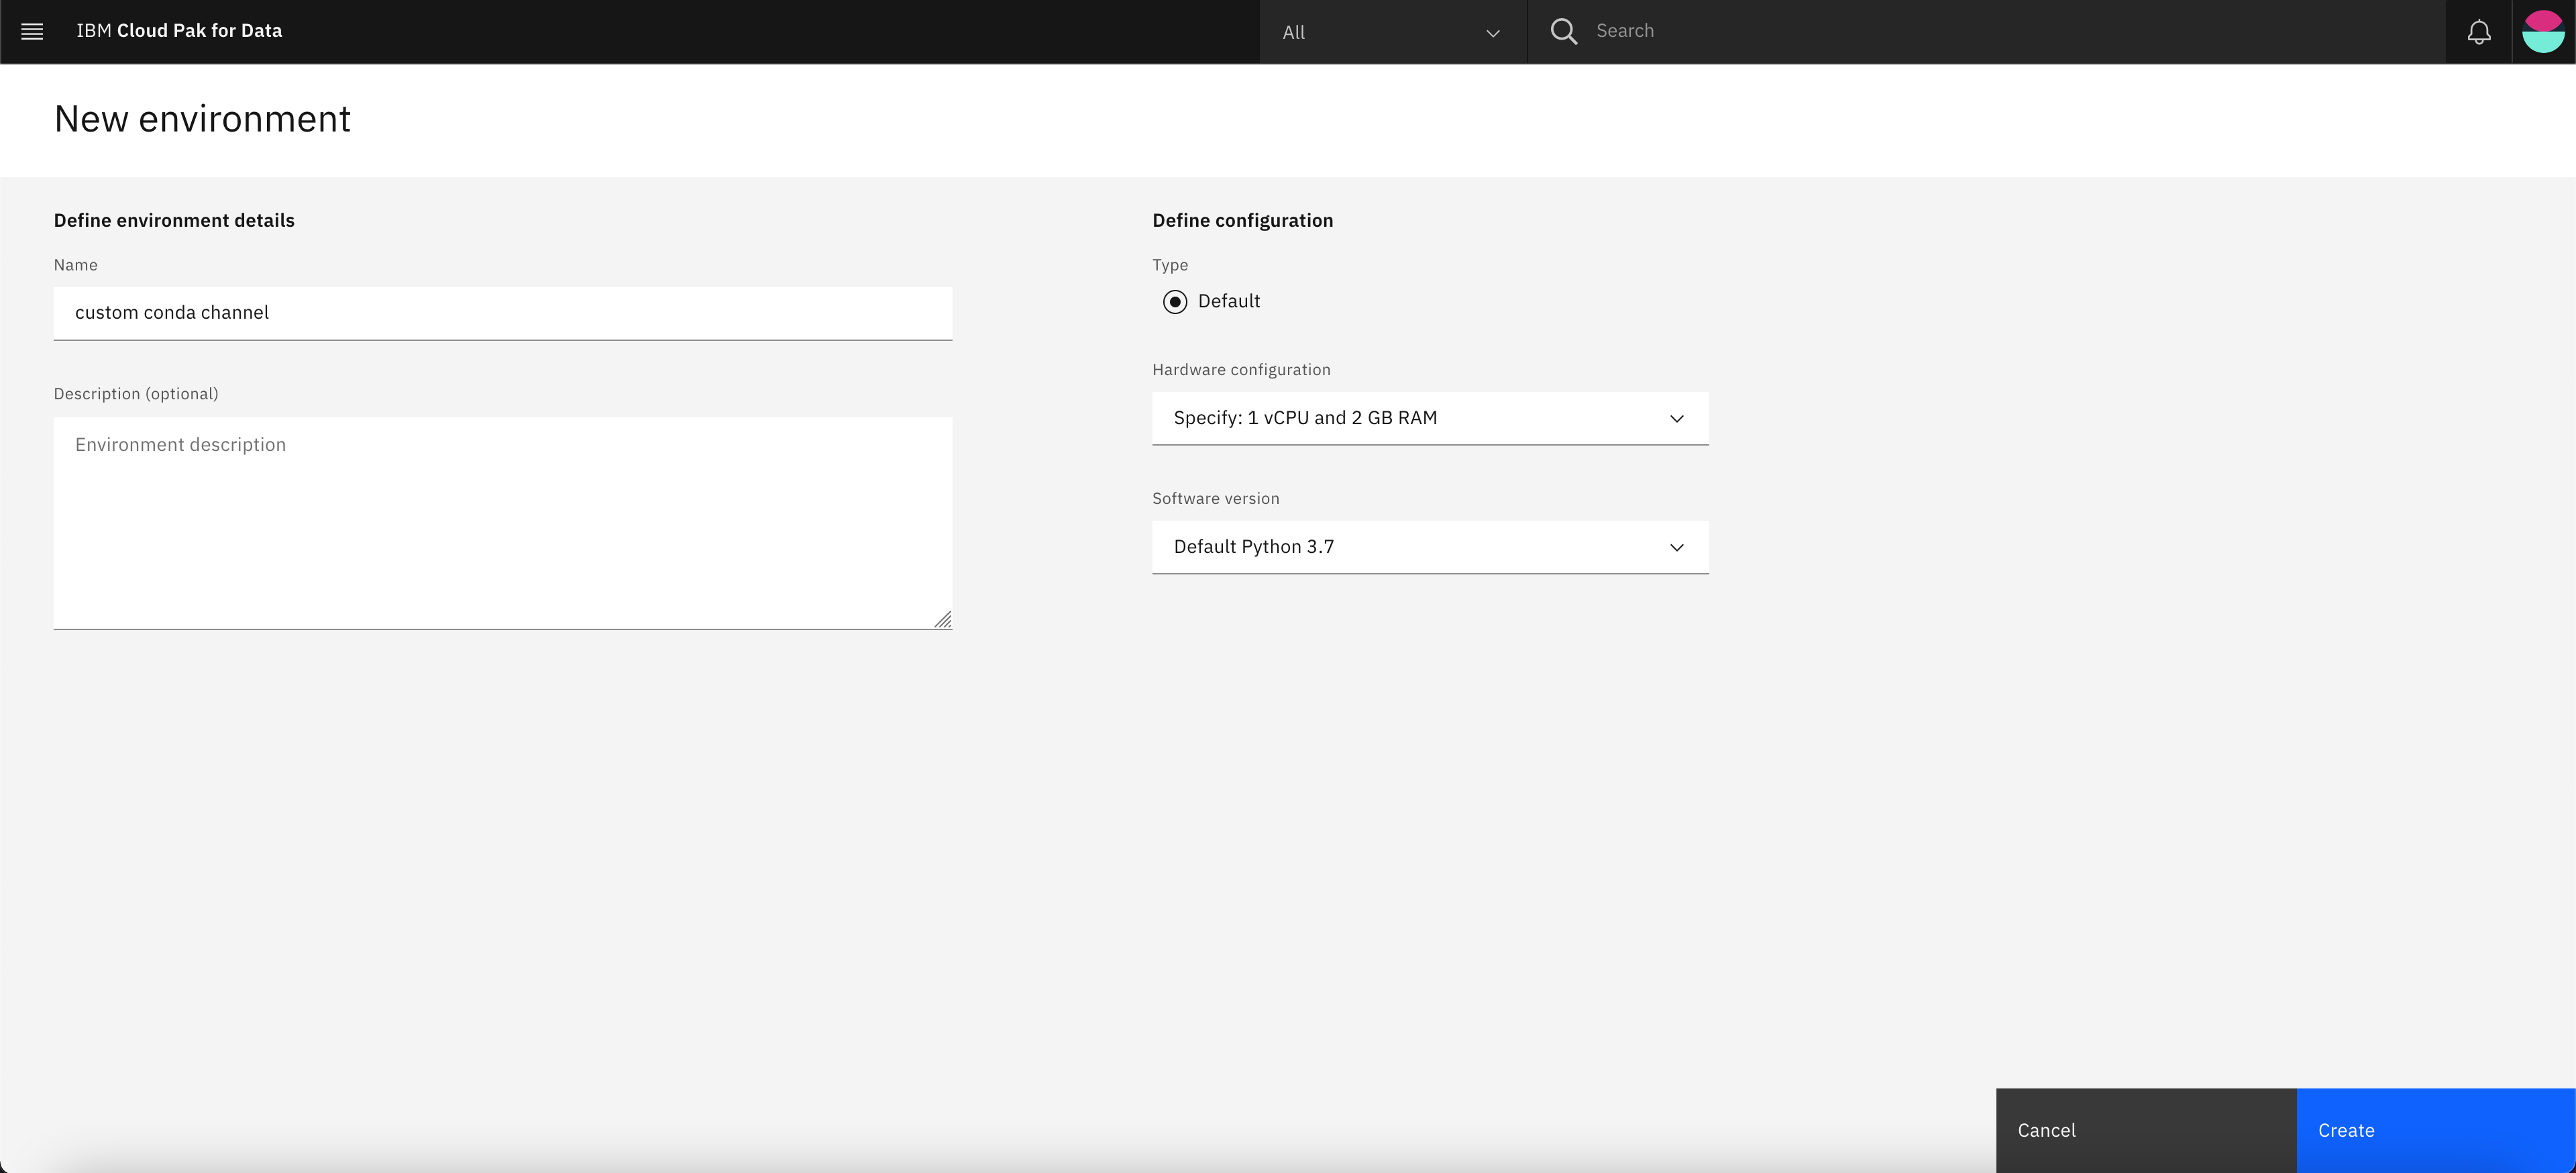

After we created the new environment, we want to apply the customization. Click "Create" now under the "Customization" section

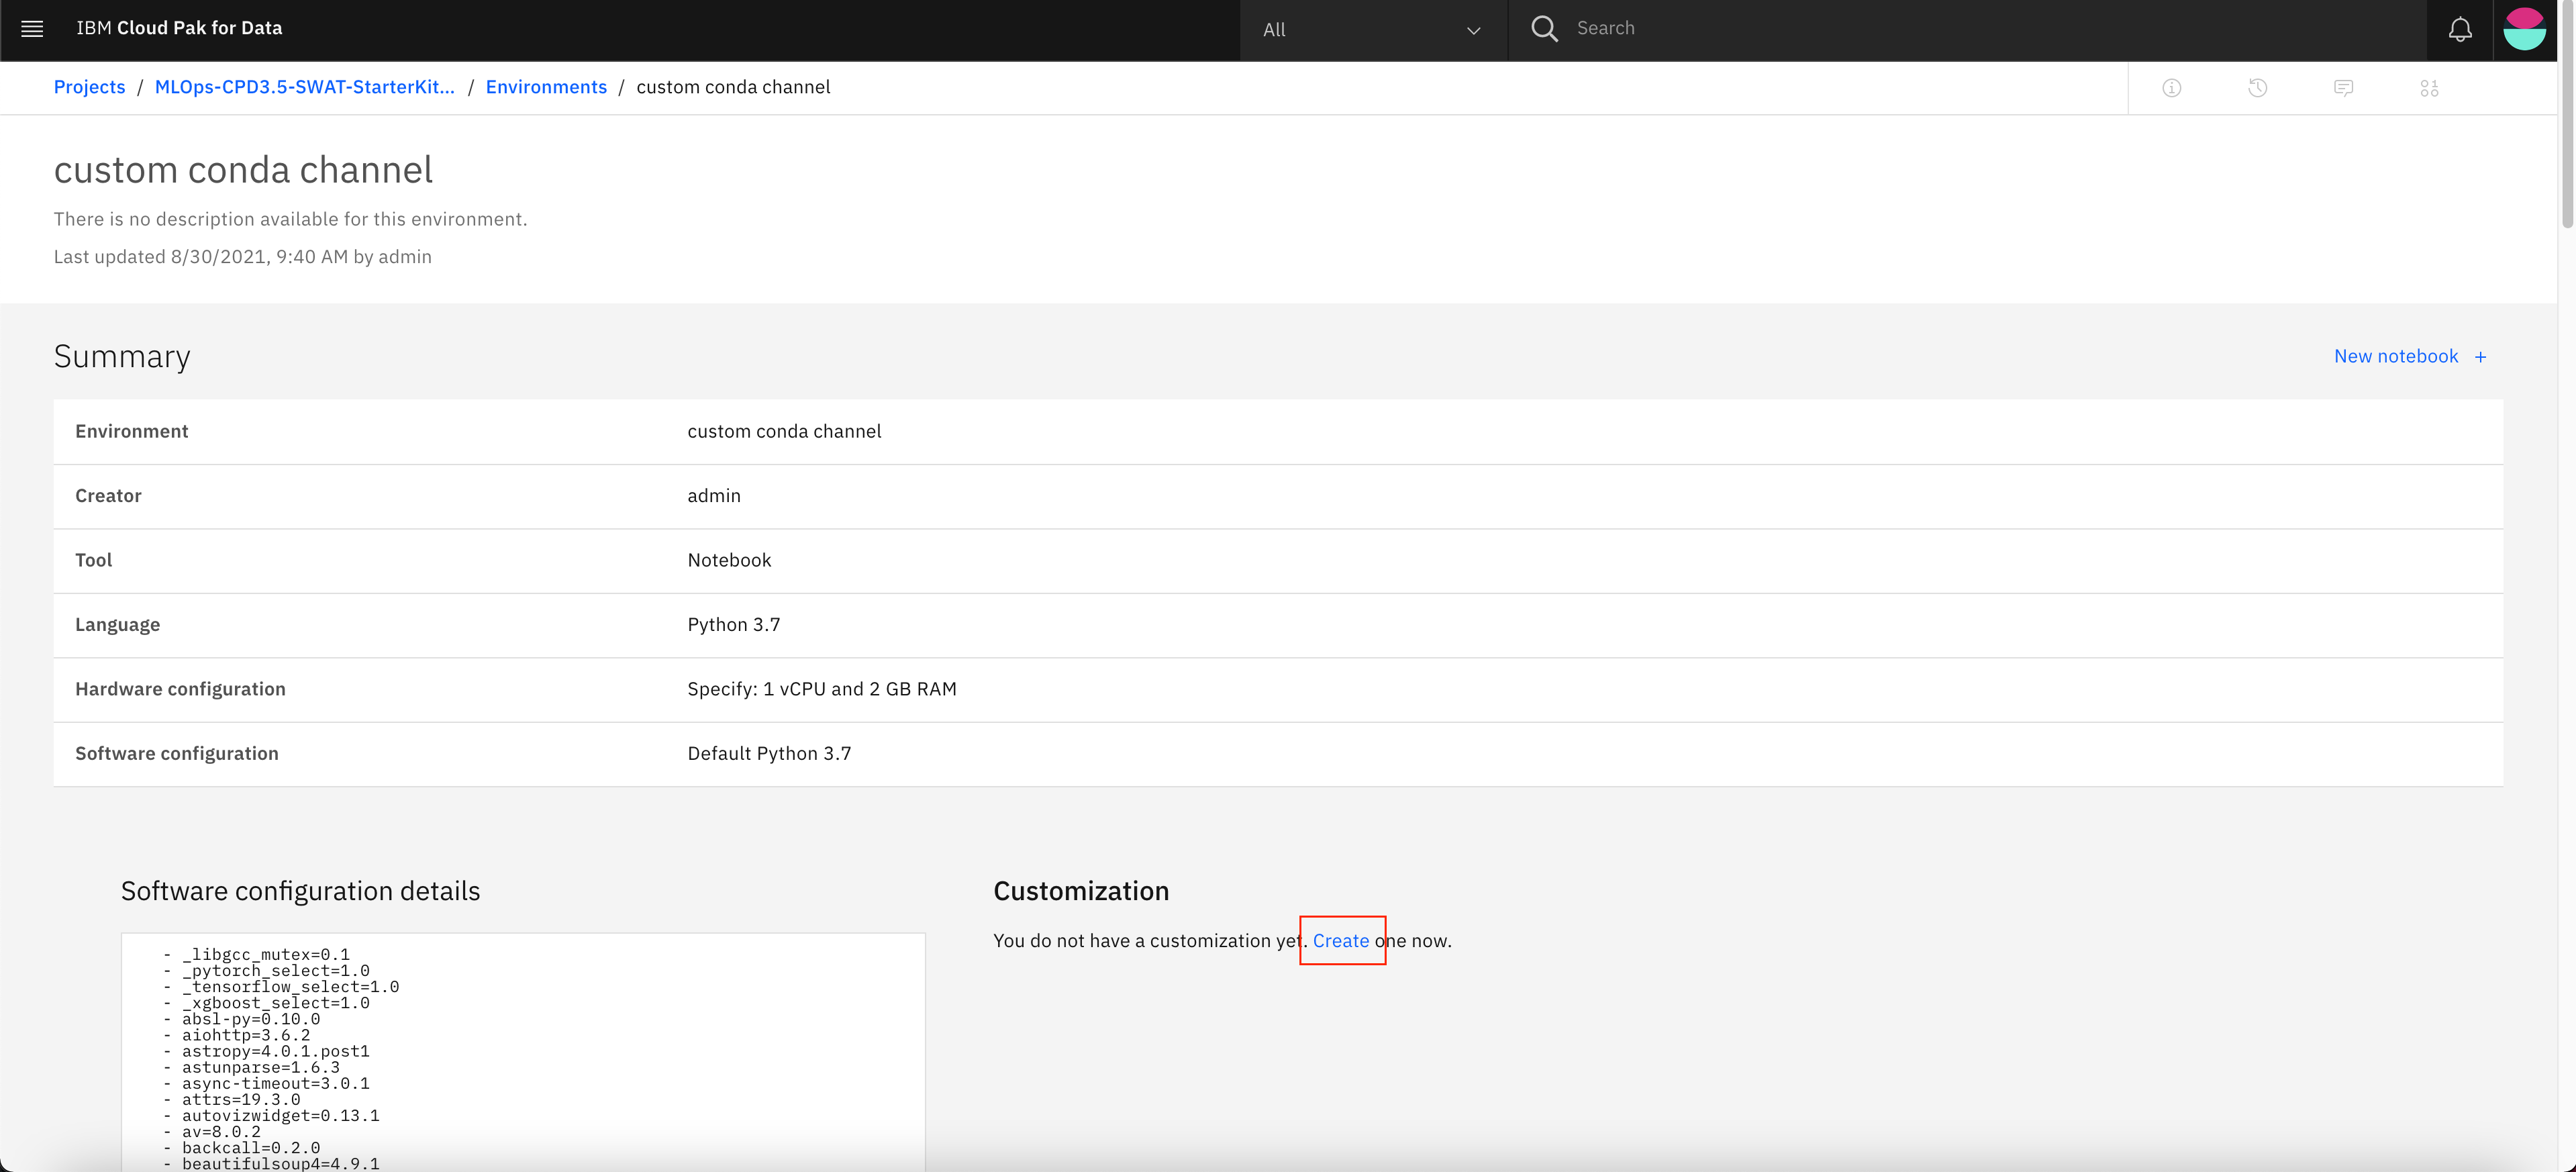

Copy the following snippet as an example which will include our custom conda file channel, then we press "Apply". Note that we are pointing to our custom channel that we've uploaded to the CPD and be able to use the `seawater` package without first manually installing it.






```
# Add conda channels below defaults, indented by two spaces and a hyphen.
channels:
  - nodefaults
  - file:///user-home/_global_/config/conda/custom-channel

# Add conda packages here, indented by two spaces and a hyphen.
dependencies:
  - seawater
```


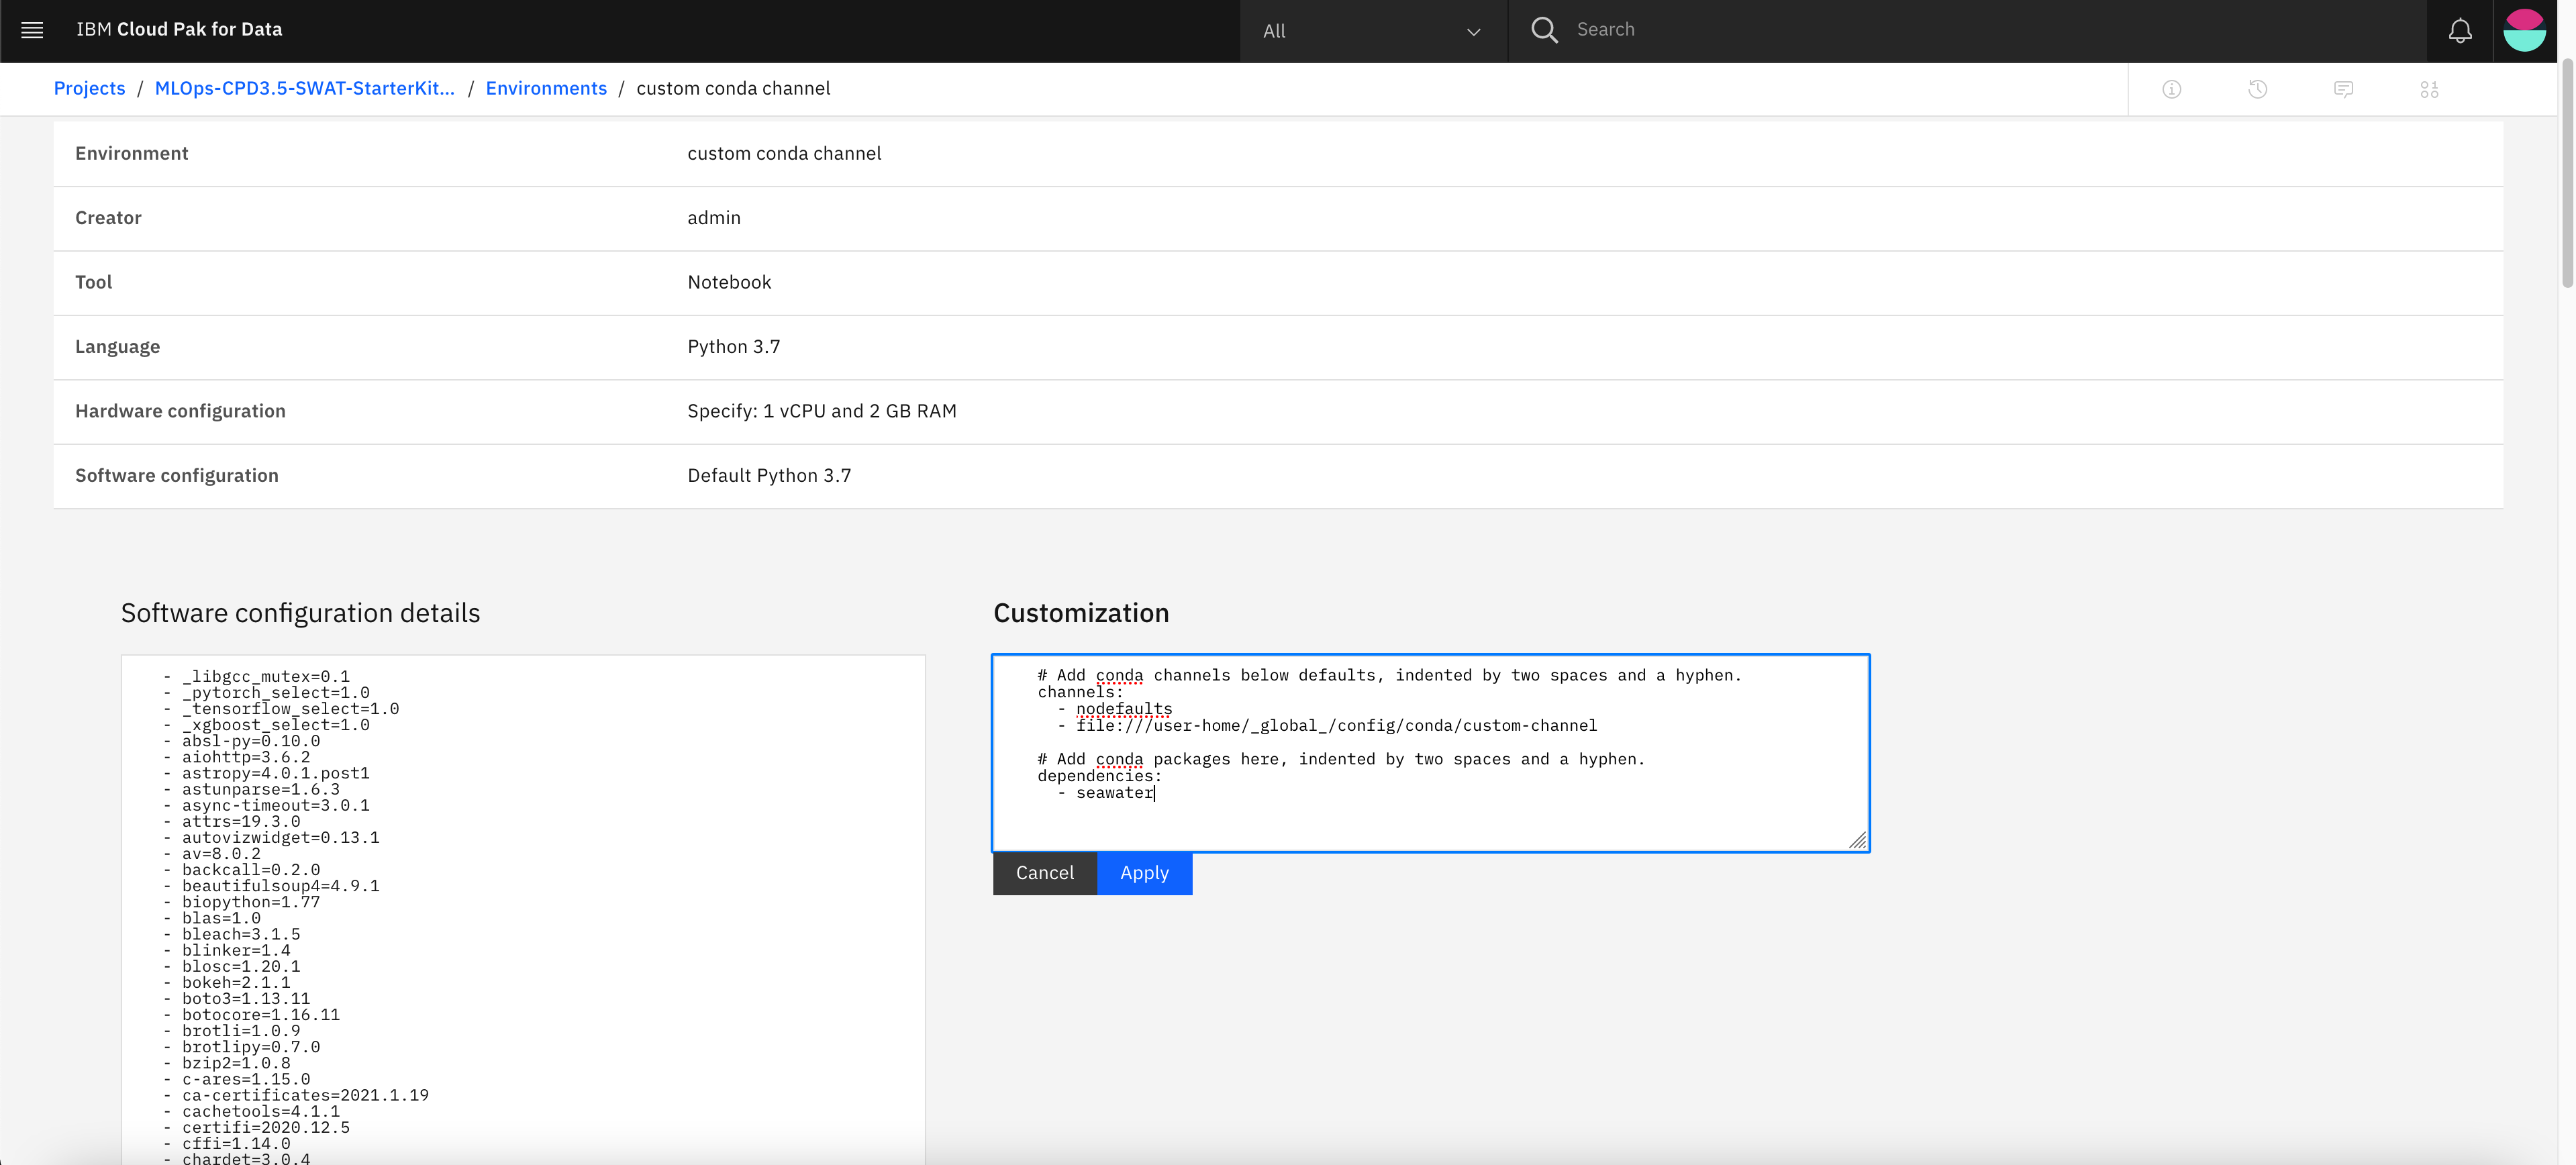

### 4) Using the Custom Environment

Now we are able to create a new notebook with this custom environment

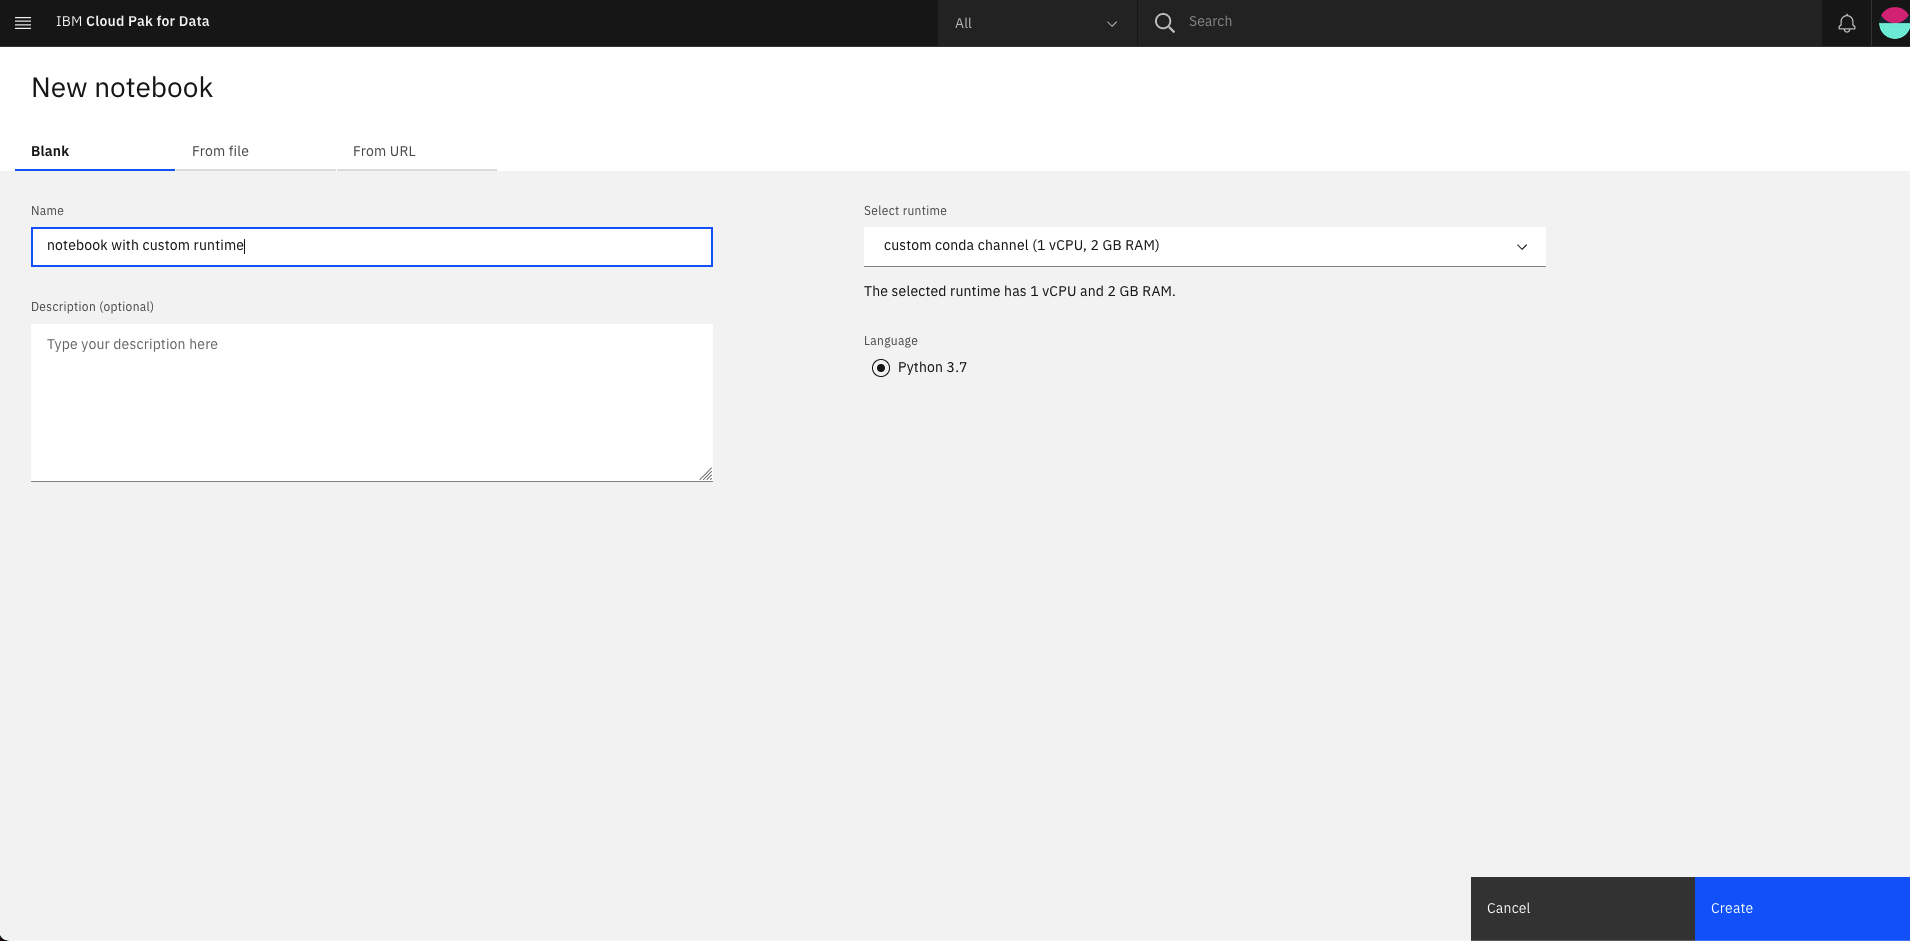

The notebook is now able to call the import statement of this package without having to manually install it.

`import seawater`

### Reference
https://conda.io/projects/conda/en/latest/user-guide/tasks/create-custom-channels.html

https://www.ibm.com/docs/en/cloud-paks/cp-data/3.5.0?topic=pip-customizing-conda#conda-with-file

https://anaconda.org/conda-forge/seawater/files